In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [6]:
train_target

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("처리중인 폴드 #", i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_target = train_target[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]],
        axis=0,
    )
    partial_train_target = np.concatenate(
        [
            train_target[: i * num_val_samples],
            train_target[(i + 1) * num_val_samples :],
        ],
        axis=0,
    )

    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_target,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
    )
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [12]:
all_scores

[2.2266390323638916, 2.7127890586853027, 2.591954231262207, 2.3612992763519287]

In [13]:
np.mean(all_scores)

2.4731703996658325

In [21]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("처리중인 폴드 #", i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_target = train_target[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]],
        axis=0,
    )
    partial_train_target = np.concatenate(
        [
            train_target[: i * num_val_samples],
            train_target[(i + 1) * num_val_samples :],
        ],
        axis=0,
    )

    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_target,
        validation_data=(val_data, val_target),
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
    )
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [20]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [23]:
all_mae_histories

[[3.9238779544830322,
  3.040346622467041,
  2.6986658573150635,
  2.603400230407715,
  2.4648287296295166,
  2.6568639278411865,
  2.2341175079345703,
  2.419769048690796,
  2.25409197807312,
  2.3485963344573975,
  2.324434757232666,
  2.1155240535736084,
  2.268634080886841,
  2.2924747467041016,
  2.146538734436035,
  2.292642116546631,
  2.169377565383911,
  2.047621965408325,
  2.020151376724243,
  2.1645870208740234,
  2.08866286277771,
  1.8666150569915771,
  2.4016408920288086,
  1.9029682874679565,
  2.0267632007598877,
  1.9414061307907104,
  2.4793922901153564,
  2.0399539470672607,
  1.8576034307479858,
  2.031362771987915,
  1.78296959400177,
  2.1062002182006836,
  1.9656972885131836,
  1.9236667156219482,
  1.9778958559036255,
  2.1761579513549805,
  2.1117377281188965,
  1.999997854232788,
  2.201409101486206,
  1.9158827066421509,
  2.2498064041137695,
  1.926741600036621,
  1.9891626834869385,
  1.9437330961227417,
  2.1091468334198,
  2.2833433151245117,
  1.8623408

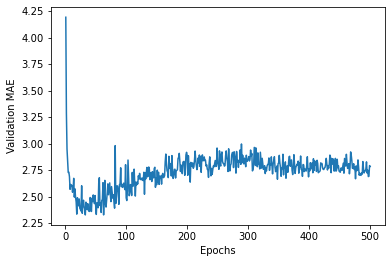

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

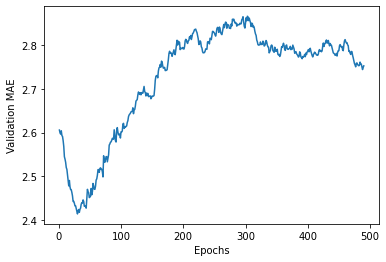

In [26]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_target, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 1ms/step - loss: 17.9433 - mae: 2.6923


In [28]:
test_mae_score

2.6922528743743896